In [1]:
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
df=pd.read_csv('/PS_20174392719_1491204439457_log.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0.0


In [4]:
mapOutput={}
j=0
count=0
for i in df['isFraud']:
  if j >200000:
    break
  mapOutput[df['amount'][j]]=df['isFraud'][j]
  count=count+1
  j=j+1
print(count,j)

200001 200001


In [5]:
dfa = pd.DataFrame(list(mapOutput.items()))
dfa

,0,1
0,9839.64,0
1,1864.28,0
2,181.00,1
3,11668.14,0
4,7817.71,0
...,...,...
198391,71076.01,0
198392,147125.05,0
198393,97529.67,0
198394,211748.46,0


In [6]:
fraud_amount = 0
fraud_number=0
fraud_avg=0
noFraud_amount = 0
noFraud_number=0
noFraud_avg=0

In [7]:
k=0
for i in dfa[1]:
  if i == 1:
    fraud_amount = dfa[0][k]+fraud_amount
    fraud_number+=1
  else:
    noFraud_amount = dfa[0][k]+noFraud_amount
    noFraud_number+=1
  k=k+1
fraud_avg = fraud_amount/fraud_number
print(fraud_avg,fraud_number)
noFraud_avg = noFraud_amount/noFraud_number
print(noFraud_avg,noFraud_number)
print(fraud_amount,fraud_number)

641742.2484415586 77
181710.11808167977 198319
49414153.13000001 77


In [8]:
#Basic libraries
import pandas as pd
import numpy as np
#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
# %matplotlib inline
#preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [9]:
#ML libraries
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
#Metrics Libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [10]:
# Import necessary libraries
import plotly.express as px
import plotly.io as pio
#Misc libraries
import warnings
warnings.filterwarnings("ignore")

In [11]:
paysim=pd.read_csv('/PS_20174392719_1491204439457_log.csv')
paysim.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [12]:
paysim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4680068 entries, 0 to 4680067
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 392.8+ MB


In [13]:
# Read the first 20,000 rows of the CSV file into a DataFrame
paysim = pd.read_csv('/PS_20174392719_1491204439457_log.csv', nrows=20000)

# Set Plotly renderer for Colab
pio.renderers.default = 'colab'

# Distribution of the "amount" column
fig = px.box(paysim, y="amount")
fig.show()

In [14]:
paysim_1=paysim.copy()
#Checking for balance in target
fig = go.Figure(data=[go.Pie(labels=['Not Fraud','Fraud'],
values=paysim_1['isFraud'].value_counts())])
fig.show()

In [15]:
#Preprocessing the dataset
#Creating a copy
paysim_1=paysim.copy()

#Checking for balance in target
fig = go.Figure(data=[go.Pie(labels=['Not Fraud','Fraud'],
values=paysim_1['isFraud'].value_counts())])
fig.show()

In [16]:
#Getting the max size
max_size = paysim_1['isFraud'].value_counts().max()
#Balancing the target label
lst = [paysim_1]
for class_index, group in paysim_1.groupby('isFraud'):
  lst.append(group.sample(max_size-len(group), replace=True))
paysim_1 = pd.concat(lst)
#Checking the balanced target
fig = go.Figure(data=[go.Pie(labels=['Not Fraud','Fraud'],
values=paysim_1['isFraud'].value_counts())])
fig.show()

In [17]:
#One hot encoding
paysim_1=pd.concat([paysim_1,pd.get_dummies(paysim_1['type'],
prefix='type_')],axis=1)
paysim_1.drop(['type'],axis=1,inplace = True)
paysim_1.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type__CASH_IN,type__CASH_OUT,type__DEBIT,type__PAYMENT,type__TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False,False,True,False
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False,False,True,False
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,False,False,False,True
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,False,True,False,False,False
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,False,False,False,True,False


In [18]:
#Splitting dependent and independent variable
paysim_2=paysim_1.copy()
X=paysim_2.drop('isFraud',axis=1)
y=paysim_2['isFraud']

In [19]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,
random_state=111)

In [20]:
#Standardizing the numerical columns
col_names=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
features_train = X_train[col_names]
features_test = X_test[col_names]
scaler = StandardScaler().fit(features_train.values)
features_train = scaler.transform(features_train.values)
features_test = scaler.transform(features_test.values)
X_train[col_names] = features_train
X_test[col_names] =features_test


In [21]:
#Dropping unnecessary columns
X_train=X_train.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1)
X_train = X_train.reset_index(drop=True)
X_test=X_test.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1)
X_test = X_test.reset_index(drop=True)

In [22]:
#creating the Model
logreg_cv = LogisticRegression(solver='liblinear',random_state=123)
dt_cv=DecisionTreeClassifier(random_state=123)
knn_cv=KNeighborsClassifier()
svc_cv=SVC(kernel='linear',random_state=123)
nb_cv=GaussianNB()
rf_cv=RandomForestClassifier(random_state=123)
cv_dict = {0: 'Logistic Regression', 1: 'DecisionTree',2:'KNN',3:'SVC',4:'Naive Bayes',5:'Random Forest'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv,rf_cv]
for i,model in enumerate(cv_models):
  print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X_train, y_train, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.9230076731039597
DecisionTree Test Accuracy: 0.9992110967816277
KNN Test Accuracy: 0.9958402372921288
SVC Test Accuracy: 0.9361325338887709
Naive Bayes Test Accuracy: 0.858818372341022
Random Forest Test Accuracy: 0.9998207114134077


In [23]:
#Desion tree
dt_cv.fit(X_train,y_train)

DecisionTreeClassifier(random_state=123)

In [24]:
ypred=dt_cv.predict(X_test)
ypred

array([1, 1, 1, ..., 0, 1, 1])

In [25]:
# print(classification_report(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))
print(accuracy_score(y_test,ypred))


[[5958    5]
 [   0 5989]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5963
           1       1.00      1.00      1.00      5989

    accuracy                           1.00     11952
   macro avg       1.00      1.00      1.00     11952
weighted avg       1.00      1.00      1.00     11952

0.9995816599732262


In [26]:
#random forest
rf_cv.fit(X_train,y_train)

RandomForestClassifier(random_state=123)

In [27]:
yRandPredic = rf_cv.predict(X_test)
yRandPredic

array([1, 1, 1, ..., 0, 1, 1])

In [28]:
print(confusion_matrix(y_test,yRandPredic))
print(classification_report(y_test,yRandPredic))
print(accuracy_score(y_test,yRandPredic))

[[5962    1]
 [   0 5989]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5963
           1       1.00      1.00      1.00      5989

    accuracy                           1.00     11952
   macro avg       1.00      1.00      1.00     11952
weighted avg       1.00      1.00      1.00     11952

0.9999163319946452


In [29]:
yRandPredic = rf_cv.predict([[1,2,3,4,5,6,7,8,9,10,11]])
print(yRandPredic)

[0]


In [30]:
#Logistic regress
logreg_cv.fit(X_train,y_train)
ylogreg_cv = logreg_cv.predict(X_test)
ylogreg_cv

array([1, 1, 1, ..., 0, 1, 1])

In [31]:
ylogreg_cv1=logreg_cv.predict([[1,2,3,4,5,6,7,8,9,10,11],[1,1241234,3234234,423423,5234,6234,7,8,9,10,11]])
print(ylogreg_cv1)

[0 1]


In [32]:
print(confusion_matrix(y_test,ylogreg_cv))
print(classification_report(y_test,ylogreg_cv))
print(accuracy_score(y_test,ylogreg_cv))

[[5259  704]
 [ 232 5757]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      5963
           1       0.89      0.96      0.92      5989

    accuracy                           0.92     11952
   macro avg       0.92      0.92      0.92     11952
weighted avg       0.92      0.92      0.92     11952

0.9216867469879518


In [33]:
#Knear cluster
knn_cv.fit(X_train,y_train)
kccnPro=knn_cv.predict(X_test)
kccnPro

array([1, 1, 1, ..., 0, 1, 1])

In [34]:
print(confusion_matrix(y_test,kccnPro))
print(classification_report(y_test,kccnPro))
print(accuracy_score(y_test,kccnPro))

[[5914   49]
 [   0 5989]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5963
           1       0.99      1.00      1.00      5989

    accuracy                           1.00     11952
   macro avg       1.00      1.00      1.00     11952
weighted avg       1.00      1.00      1.00     11952

0.9959002677376171


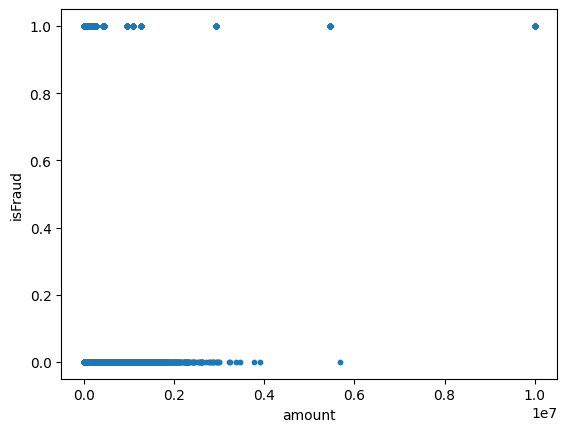

In [35]:
paysim_2.plot.scatter(x = 'amount', y = 'isFraud', s = 10);

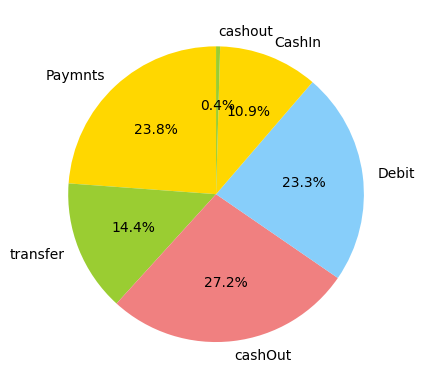

In [36]:
# Data to plot
labels = ['Paymnts','transfer','cashOut','Debit','CashIn','cashout']
sizes = [215, 130, 245, 210,98,4]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
# explode = (0.1, 0, 0, 0) # explode 1st slice
# Plot
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%',startangle=90)
# plt.axis('equal')
plt.show()